# Homework 8
### Cody Costa, David Loi

### Problem 1

#### a)

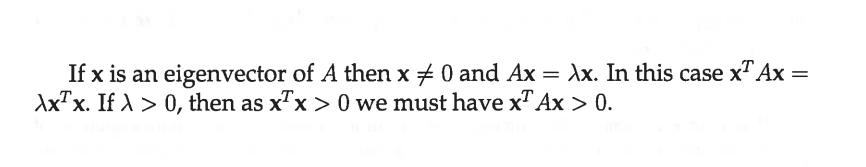

#### b)

## Notebook Assignment

In [261]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.stats as stats

#### Load Data to Analyze

In [262]:
data = pd.read_csv('emnist-digits-test.csv', header=None, sep=',', dtype='uint')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Filter data into suggested usable set (sum of each row in the table)

In [263]:
row_sums = np.sum(data, axis=1)
row_sums

0        40376
1        21547
2        35224
3        39065
4        45823
         ...  
39995    30171
39996    30904
39997    37759
39998    23020
39999    32676
Length: 40000, dtype: uint64

#### Compute Mean and Variance

In [264]:
MEAN = np.mean(row_sums)
VARIANCE = np.var(row_sums)

In [265]:
MEAN, VARIANCE

(34698.252, 99515279.57419601)

#### For a Sample Size of 50, Calculate 1000 random reps of the MEAN, and estimate the VARIANCE

In [266]:
sample_size = 50
num_runs = 1000
random_mean_vals = np.zeros(num_runs)
random_variance_vals = np.zeros(num_runs)

for j in range(num_runs):
    sample_set = np.zeros(sample_size)

    for k in range(sample_size):
        sample_set[k] = row_sums[np.random.randint(0, row_sums.shape[0])]

    random_mean_vals[j] = np.mean(sample_set)
    random_variance_vals[j] = np.var(sample_set)

In [267]:
random_mean_vals.shape, random_variance_vals.shape

((1000,), (1000,))

In [268]:
random_mean_vals

array([31439.58, 33921.3 , 34022.16, 33882.26, 33340.6 , 34839.5 ,
       31783.52, 34268.32, 35547.52, 33808.02, 36540.08, 33045.4 ,
       34493.52, 33158.76, 35716.76, 33972.58, 34736.4 , 33265.96,
       34831.64, 36259.02, 34065.86, 36143.16, 33494.1 , 34781.92,
       31163.6 , 35033.56, 34541.38, 33426.84, 34035.34, 33161.42,
       36075.4 , 34110.72, 32537.56, 34217.04, 33949.22, 34125.88,
       32547.04, 34447.6 , 32624.92, 35621.62, 36170.58, 33886.02,
       37308.04, 32133.56, 34496.62, 34238.98, 33836.84, 34287.2 ,
       35280.24, 34229.52, 32046.44, 33495.26, 34400.58, 32420.38,
       34727.52, 35749.62, 33217.08, 35462.56, 34574.14, 33322.94,
       34931.42, 32747.74, 36049.32, 35370.58, 34922.5 , 31826.56,
       34188.8 , 36115.58, 35739.46, 32511.42, 32235.74, 36783.94,
       34054.  , 34611.58, 34779.88, 33119.92, 33735.74, 33490.08,
       36050.52, 34159.9 , 34071.14, 35522.62, 34987.82, 33971.82,
       36335.52, 35778.38, 35072.42, 31860.04, 33375.72, 33431

In [269]:
random_variance_vals

array([7.21458396e+07, 9.87235915e+07, 1.09543925e+08, 8.95003766e+07,
       9.29474460e+07, 1.20439059e+08, 8.93149663e+07, 1.24060555e+08,
       1.16962300e+08, 1.10828620e+08, 8.34240965e+07, 9.96432408e+07,
       6.38829075e+07, 1.06624592e+08, 1.16571270e+08, 1.08184410e+08,
       1.01717869e+08, 9.85399814e+07, 8.04732601e+07, 7.24376325e+07,
       1.52921439e+08, 1.74634842e+08, 8.90628845e+07, 8.64065078e+07,
       8.78913944e+07, 1.17355205e+08, 9.16012010e+07, 9.25239166e+07,
       6.03586163e+07, 6.43285270e+07, 1.00540316e+08, 1.17968603e+08,
       8.85294016e+07, 9.94598056e+07, 8.06329677e+07, 1.05472258e+08,
       1.16550569e+08, 8.78237658e+07, 1.18414893e+08, 9.73782771e+07,
       7.44627754e+07, 9.86895813e+07, 9.84597079e+07, 9.37931250e+07,
       9.23719895e+07, 7.46290819e+07, 9.09725396e+07, 1.00290260e+08,
       5.09368484e+07, 8.36423255e+07, 7.95298948e+07, 8.87738576e+07,
       1.23847397e+08, 9.34911181e+07, 1.33284873e+08, 9.91225835e+07,
      

In [270]:
np.mean(random_variance_vals)

98136734.71091479

#### Compute Error Between Global and Sample Variance

In [271]:
var_err = 100 * abs(VARIANCE - np.mean(random_variance_vals)) / VARIANCE
print(f'{np.round(var_err, 2)} % error')

1.39 % error


#### Compare Interval Estimate of the Sample Mean

#### method 1, plot results using estimated value of the sample mean variance
#### The below figure plots both normal distributions as a comparison between the exact and estimated data

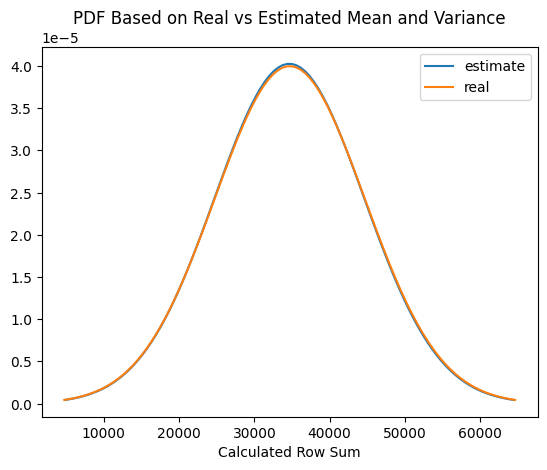

In [272]:
# plot a distribution of estimated values of the mean and variance

sigma = np.sqrt(np.mean(random_variance_vals))
mu = np.mean(random_mean_vals)

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))


# plot a distribution of the real values of the mean and variance

y = np.linspace(MEAN - 3 * np.sqrt(VARIANCE), MEAN + 3 * np.sqrt(VARIANCE), 100)
plt.plot(y, stats.norm.pdf(y, MEAN, np.sqrt(VARIANCE)))


plt.legend(['estimate', 'real'])
plt.title('PDF Based on Real vs Estimated Mean and Variance')
plt.xlabel('Calculated Row Sum')
plt.show()

#### both graphs line up nicely, low error

#### method 2, graph a histogram of estimated sample mean values

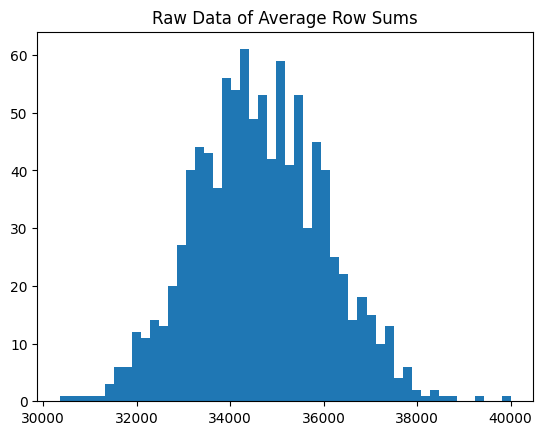

In [273]:
plt.hist(random_mean_vals, bins=50)
plt.title('Raw Data of Average Row Sums')
plt.show()

#### we can observe the histogram compared to the plot of the estimated data by scaling the graphs

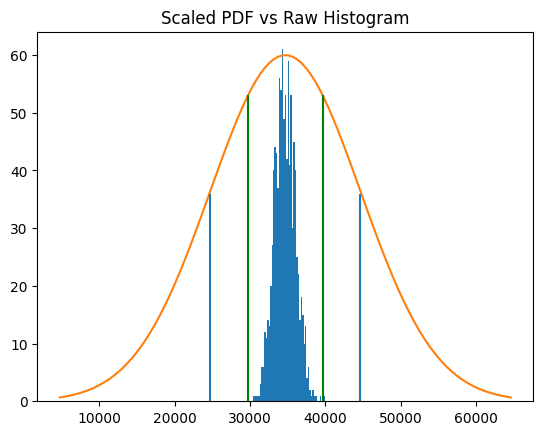

In [274]:
plt.hist(random_mean_vals, bins=50)
plt.plot(y, 15e5*stats.norm.pdf(y, MEAN, np.sqrt(VARIANCE)))

# mark +/- 1 stdev away from mean
plt.vlines([MEAN-np.sqrt(VARIANCE), MEAN+np.sqrt(VARIANCE)], ymin=0, ymax=36)

# mark +/- 1/2 stdev away from mean
plt.vlines([MEAN-np.sqrt(VARIANCE)/2, MEAN+np.sqrt(VARIANCE)/2], ymin=0, ymax=53, colors='green')

plt.title('Scaled PDF vs Raw Histogram')
plt.show()

#### Test that the extremes of the histogram fall within +/- 1 Standard Deviation of the global mean

In [275]:
hist_min = np.min(random_mean_vals)
hist_max = np.max(random_mean_vals)

print(f'histogram min = {np.round(hist_min)},\t{np.round((hist_min - MEAN) / np.sqrt(VARIANCE), 2)}\tstdev\'s away from the mean')
print(f'histogram max = {np.round(hist_max)},\t{np.round((hist_max - MEAN) / np.sqrt(VARIANCE), 2)}\tstdev\'s away from the mean')

histogram min = 30359.0,	-0.44	stdev's away from the mean
histogram max = 40004.0,	0.53	stdev's away from the mean
